In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits

In [4]:
#loading image
fits_image_filename=fits.util.get_testdata_filepath('test0.fits')
print(fits_image_filename)
hdul=fits.open(fits_image_filename)

/Users/mac/anaconda3/lib/python3.8/site-packages/astropy/io/fits/tests/data/test0.fits


In [5]:
dirname=fits_image_filename[0:fits_image_filename.rfind('/')+1]
print(dirname)
fname=fits_image_filename[fits_image_filename.rfind('/')+1:-1]
print(fname)

/Users/mac/anaconda3/lib/python3.8/site-packages/astropy/io/fits/tests/data/
test0.fit


In [6]:
ls /Users/mac/anaconda3/lib/python3.8/site-packages/astropy/io/fits/tests/data/

arange.fits                  invalid/
ascii.fits                   memtest.fits
ascii_i4-i20.fits            o4sp040b0_raw.fits
blank.fits                   random_groups.fits
btable.fits                  scale.fits
chandra_time.fits            stddata.fits
checksum.fits                table.fits
comp.fits                    tb.fits
compressed_float_bzero.fits  tdim.fits
compressed_image.fits        test0.fits
fixed-1890.fits              test1.fits
group.fits                   variable_length_table.fits
history_header.fits          zerowidth.fits


In [7]:
hdul.info()

Filename: /Users/mac/anaconda3/lib/python3.8/site-packages/astropy/io/fits/tests/data/test0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     138   ()      
  1  SCI           1 ImageHDU        61   (40, 40)   int16   
  2  SCI           2 ImageHDU        61   (40, 40)   int16   
  3  SCI           3 ImageHDU        61   (40, 40)   int16   
  4  SCI           4 ImageHDU        61   (40, 40)   int16   


In [8]:
hdul[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
GROUPS  =                    F / data has groups                                
NEXTEND =                    4 / Number of standard extensions                  
BSCALE  =           1.000000E0 / REAL = TAPE*BSCALE + BZERO                     
BZERO   =           3.276800E4 /                                                
ORIGIN  = 'NOAO-IRAF FITS Image Kernel Aug 1 1997' / FITS file originator       
DATE    = '01/04/99  '         / Date FITS file was generated                   
IRAF-TLM= 'xxx     '              / Time of last modification                   
                                                                                
              / GROUP PARAME

In [9]:
hdul[0].header['ORIGIN']

'NOAO-IRAF FITS Image Kernel Aug 1 1997'

In [12]:
image1=hdul[1].data
image2=hdul[2].data
image3=hdul[3].data
type(image1)

numpy.ndarray

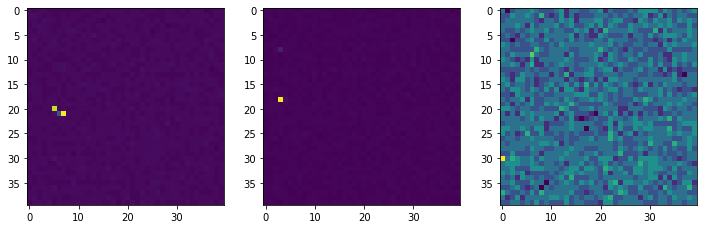

In [13]:
fig,ax=plt.subplots(1,3,figsize=(12,4))
ax[0].imshow(image1)
ax[1].imshow(image2)
ax[2].imshow(image3)

In [14]:
fits_table_filename=fits.util.get_testdata_filepath('table.fits')
print(fits_table_filename)
hdul=fits.open(fits_table_filename)
hdul.info()

/Users/mac/anaconda3/lib/python3.8/site-packages/astropy/io/fits/tests/data/table.fits
Filename: /Users/mac/anaconda3/lib/python3.8/site-packages/astropy/io/fits/tests/data/table.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     12   3R x 2C   [20A, E]   


In [15]:
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  

In [16]:
data=hdul[1].data
hdul[1].columns

ColDefs(
    name = 'target'; format = '20A'
    name = 'V_mag'; format = 'E'
)

In [18]:
print(data['target'],data['V_mag'])

['NGC1001' 'NGC1002' 'NGC1003'] [11.1 12.3 15.2]


In [19]:
type(data['V_mag'])

numpy.ndarray

In [33]:
vmag,color,parallax,error=np.loadtxt("http://burro.astr.cwru.edu/Academics/Astr221/HW/HW5/yaletrigplx.dat", unpack=True, usecols=(1,2,3,4))

In [21]:
data.shape

(6220, 5)

In [22]:
data[0:2]

array([[2.00e+00, 4.61e+00, 1.04e+00, 1.35e-02, 1.49e+02],
       [3.00e+00, 8.45e+00, 1.05e+00, 7.17e-02, 1.13e+02]])

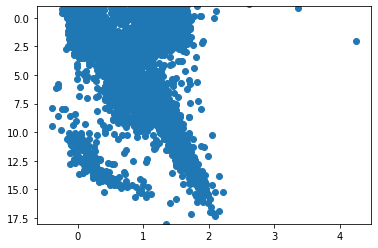

In [37]:
plt.ylim([18,-1])
d=1/parallax
M=vmag-5*np.log10(d/10)
plt.scatter(color,M)